# How to extract 3D structure of the nebulae from the LVM data simulator

1. Initialize the LVM Field

In [29]:
import os
from lvmdatasimulator.field import LVMField
import astropy.units as u
import astropy.table as Table
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
#os.chdir('/Users/mors/Science/LVM/Simulator_example/')  # Your top-level working directory
os.chdir('/home/amrita/LVM/lvmnebular/')

In [30]:
#Some random of the LVM Field
'''
ra = 12.34 # u.degree
dec = -20.35 # u.degree
fov_size = 35 # u.arcmin
fov_pixel = 1 # u.arcsec
distance = 50 # * u.kpc
sys_vel = 0 #* u.km / u.s
turbulent_sigma = 20 #* u.km / u.s
preserve_kinematics = False
'''
#specifing parameters
ra = 90.5625 # u.degree
dec = 4.998333 # u.degree
fov_size = 10 # u.arcmin
fov_pixel = 10 # u.arcsec
distance = 16.0 * u.kpc
sys_vel = 20 #* u.km / u.s
turbulent_sigma = 15 #* u.km / u.s
preserve_kinematics = False

unit_ra = u.degree
unit_dec = u.degree
unit_size = u.arcmin
unit_pixel = u.arcsec

name = 'LVM_extract3D'
my_lvmfield = LVMField(ra=ra, dec=dec, size=fov_size, pxsize=fov_pixel, name=name,
                       unit_ra=unit_ra, unit_dec=unit_dec, unit_size=unit_size, unit_pxsize=unit_pixel,
                       ism_params={'distance': distance, 'sys_velocity': sys_vel, 'turbulent_sigma': turbulent_sigma,
                                   'preserve_kinematics': preserve_kinematics})

2. Define the properties of the nebula to be simulated
Let's simulate only a Bubble in our FOV

In [31]:
'''
my_nebulae = [{'type': 'Bubble3D',
               'max_brightness': 1.e-14,
               'thickness': 0.85,
               'radius': 10*u.pc,
               'expansion_velocity': 15,
                'turbulent_sigma': 15,
                'sys_velocity': 0,
               'model_params': {'Z': 0.6, 'qH': 50, 'nH': 100, 'Geometry': 'Cloud', 'Teff': 35000.},
               'model_type': 'cloudy',
               'offset_RA':0,
               'offset_DEC':-20},
              ]
'''
my_nebulae = [{'type': 'Bubble3D',
               'max_brightness': 5e-14,
               'thickness': 0.8,
               'radius': 18*u.pc,
               'expansion_velocity': 10,
                'turbulent_sigma': 15,
                'sys_velocity': 10,
               'model_params': {'Z': 1.0, 'qH': 50., 'nH': 100, 'Geometry': 'Shell', 'Teff': 40000.},
               'model_type': 'cloudy',
               'offset_RA':0,
               'offset_DEC':0},
              ]

3. Add this nebula to the LVM Field

In [32]:
my_lvmfield.add_nebulae(my_nebulae)

[INFO]: Start generating 1 nebulae
[WARNING]: Use the closest pre-computed model with id = Shell_921. Its parameters: Geometry = Shell; Z = 1.0; qH = 50.0; LogLsun = 6.5; Teff = 30000.0; nH = 100.0; 


4. Perfect! Now you have access to all the properties of the nebulae considered in the simulator.

In [60]:
print(my_lvmfield.ism.nebulae_objects[0].max_brightness)
print(my_lvmfield.ism.nebulae_objects[0].thickness)
print(my_lvmfield.ism.nebulae_objects[0].radius)
print(my_lvmfield.ism.nebulae_objects[0].expansion_velocity)


5e-14 erg / (s arcsec2 cm2)
0.8
18.0 pc
10.0 km / s


One access the relative 3D brightness distribution in cartesian or in spherical coordinates.

In [61]:
print(my_lvmfield.ism.nebulae_objects[0]._brightness_3d_cartesian.shape)  # nz, ny, nx, where nx is along line-of-sight
print(my_lvmfield.ism.nebulae_objects[0]._brightness_3d_spherical.shape)  # rad, theta, phi

print(np.mean(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian) )
print(np.max(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian) )
print(np.min(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian) )

c3D=my_lvmfield.ism.nebulae_objects[0]._brightness_3d_cartesian #
print(c3D[10, 20, 30]) #considering uniform brightness in each shell=1 (default)


(49, 49, 100)
(70, 90, 90)
1.8961311803032964e-08
2.9882759216562854e-06
-6.481277213944785e-08
2.204585537918871e-06


In [35]:
print(my_lvmfield.ism.nebulae_objects[0]._cartesian_x_grid)  # this one is along line-of-sight
print(my_lvmfield.ism.nebulae_objects[0]._cartesian_y_grid)
print(my_lvmfield.ism.nebulae_objects[0]._cartesian_z_grid.shape)


[-18.36       -17.98909091 -17.61818182 -17.24727273 -16.87636364
 -16.50545455 -16.13454545 -15.76363636 -15.39272727 -15.02181818
 -14.65090909 -14.28       -13.90909091 -13.53818182 -13.16727273
 -12.79636364 -12.42545455 -12.05454545 -11.68363636 -11.31272727
 -10.94181818 -10.57090909 -10.2         -9.82909091  -9.45818182
  -9.08727273  -8.71636364  -8.34545455  -7.97454545  -7.60363636
  -7.23272727  -6.86181818  -6.49090909  -6.12        -5.74909091
  -5.37818182  -5.00727273  -4.63636364  -4.26545455  -3.89454545
  -3.52363636  -3.15272727  -2.78181818  -2.41090909  -2.04
  -1.66909091  -1.29818182  -0.92727273  -0.55636364  -0.18545455
   0.18545455   0.55636364   0.92727273   1.29818182   1.66909091
   2.04         2.41090909   2.78181818   3.15272727   3.52363636
   3.89454545   4.26545455   4.63636364   5.00727273   5.37818182
   5.74909091   6.12         6.49090909   6.86181818   7.23272727
   7.60363636   7.97454545   8.34545455   8.71636364   9.08727273
   9.45818182   

In [37]:
def compute_cooling(data, ion, line):

    line = np.array([ 5007])
    em_line = np.array([72])

    chi = 6.626e-24*299792458/line      # in units of joules

    for i in range(19):
        
        E0 = data[72, i, i, i]
        data[72, i, i, i] = E0*chi/np.mean(ion)

    print(np.mean(data[72, 15, 15, 15]), i, chi)
    return data
    #cooling_cube = data.copy()
#
    #for i,j in zip(line, em_line):
    #    chi = 6.626e-24*299792458/i
    #    E0 = data[j, :, :, :]
    #    cooling_cube[j, :, :, :] = E0*chi/np.mean(ion)
#
    #return cooling_cube

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 6.0516329727205205e-30), (15, 6.330714323040372e-30), (16, 8.921196188318726e-30), (17, 3.4262237438779625e-29), (18, 2.6583362668814806e-28), (19, 2.4626490702935243e-27), (20, 2.3716210414497125e-26), (21, 2.5841705314183577e-25), (22, 2.1148555842810553e-24), (23, 1.9313460342211643e-23), (24, 8.857991947006339e-23), (25, 1.6653890995992948e-22), (26, 2.1320041190690963e-22), (27, 2.1814203812119326e-22), (28, 1.807409166593986e-22), (29, 1.0688189957488173e-22), (30, 3.255475194596612e-23), (31, 4.031531422722041e-24), (32, 4.449471488790281e-25), (33, 4.8576303023044573e-26), (34, 5.619417741728536e-27), (35, 5.540107297972994e-28), (36, 5.111695703854351e-29), (37, 1.0958072613584299e-29), (38, 6.578974224113376e-30), (39, 6.084445381699726e-30), (40, 6.865102746337743e-31), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.0), (46

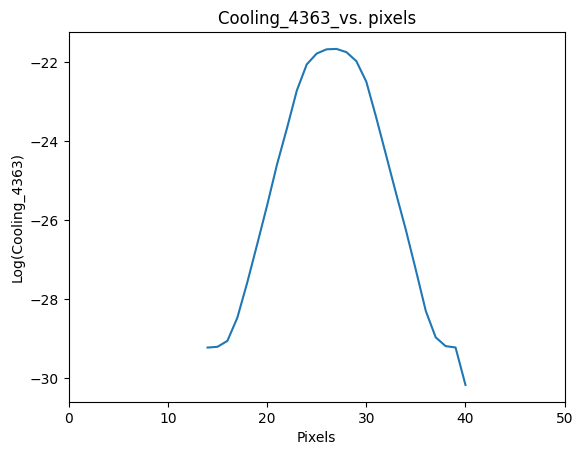

In [99]:
simname = 'Bubble_v2_5e-14'

with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
    vals=hdu['Comp_0_PhysParams'].data


with fits.open('./Perturbation/cube_4D_cart.fits') as hdul:
     data=hdul[0].data
     header = hdul[0].header

x1max = np.max(my_lvmfield.ism.nebulae_objects[0]._cartesian_x_grid)
y1max = np.max(my_lvmfield.ism.nebulae_objects[0]._cartesian_y_grid)
z1max = np.max(my_lvmfield.ism.nebulae_objects[0]._cartesian_z_grid)

x1 = np.linspace(0, x1max, 49)
y1 = np.linspace(0, y1max, 49)
z1 = np.linspace(0, z1max, 49)

rad = []
for x,y,z in zip(x1, y1, z1):
    r = np.sqrt(x**2+y**2+z**2)
    rad.append(r)

line = 3726
chi = 6.626e-24*299792458*1e7/line

cooling_results = []  
for i, j in enumerate(rad):
    i = int(i)
    cooling_value = data[16, i, i, i] * chi / np.mean(vals[5])
    cooling_results.append((i, cooling_value))

print(cooling_results)

hdu=fits.PrimaryHDU(data = cooling_results, header = header)
hdu.writeto('./Perturbation/cooling_cube_OIII.fits', overwrite='True')

i_values, cooling_values = zip(*cooling_results)

# Create a plot
plt.plot(i_values, np.log10(cooling_values))

# Add labels and title
plt.xlabel('Pixels')
plt.ylabel('Log(Cooling_'+str(line)+')')
plt.title('Cooling_'+str(line)+'_vs. pixels')
plt.xlim(0, 50)
# Show the plot
plt.show()

In [39]:
my_lvmfield.ism.nebulae_objects[0]._theta_grid
print(my_lvmfield.ism.nebulae_objects[0]._rad_grid.shape)
my_lvmfield.ism.nebulae_objects[0]._phi_grid

(70,)


array([0.        , 0.07059759, 0.14119518, 0.21179276, 0.28239035,
       0.35298794, 0.42358553, 0.49418311, 0.5647807 , 0.63537829,
       0.70597588, 0.77657346, 0.84717105, 0.91776864, 0.98836623,
       1.05896382, 1.1295614 , 1.20015899, 1.27075658, 1.34135417,
       1.41195175, 1.48254934, 1.55314693, 1.62374452, 1.69434211,
       1.76493969, 1.83553728, 1.90613487, 1.97673246, 2.04733004,
       2.11792763, 2.18852522, 2.25912281, 2.32972039, 2.40031798,
       2.47091557, 2.54151316, 2.61211075, 2.68270833, 2.75330592,
       2.82390351, 2.8945011 , 2.96509868, 3.03569627, 3.10629386,
       3.17689145, 3.24748904, 3.31808662, 3.38868421, 3.4592818 ,
       3.52987939, 3.60047697, 3.67107456, 3.74167215, 3.81226974,
       3.88286732, 3.95346491, 4.0240625 , 4.09466009, 4.16525768,
       4.23585526, 4.30645285, 4.37705044, 4.44764803, 4.51824561,
       4.5888432 , 4.65944079, 4.73003838, 4.80063597, 4.87123355,
       4.94183114, 5.01242873, 5.08302632, 5.1536239 , 5.22422

Similar for 4D, where first dimension is a line ID

In [40]:
print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian.shape)
print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_spherical.shape)

#print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian)
#print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_spherical)

#ind5007=100
#my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian[ind5007,:,:,:]=pertemcube

(141, 49, 49, 100)
(141, 70, 90, 90)


In [41]:
hdu1=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0]._brightness_3d_cartesian)
hdul1=fits.HDUList([hdu1])
hdul1.writeto('./Perturbation/cube_3D_cart.fits', overwrite=True)

In [42]:
hdu=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_spherical)
hdul=fits.HDUList([hdu])
hdul.writeto('./Perturbation/cube_sph.fits', overwrite=True) #storing 4D cube in fits format (spherical coordinate)

In [43]:
hdu1=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian)
hdul1=fits.HDUList([hdu1])

hdul1.writeto('./Perturbation/cube_4D_cart.fits', overwrite=True)

In [44]:
hdu1=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0].wl_list)
hdul1=fits.HDUList([hdu1])

hdul1.writeto('./Perturbation/lines_from_4Dcube.fits', overwrite=True)

for i, lines in enumerate(my_lvmfield.ism.nebulae_objects[0].wl_list):

    print(i, lines)


0 3613.64
1 3634.08
2 3669.46
3 3671.47
4 3673.75
5 3676.36
6 3679.35
7 3682.8
8 3686.83
9 3691.55
10 3697.15
11 3703.85
12 3704.76
13 3711.97
14 3721.63
15 3721.93
16 3726.03
17 3728.81
18 3734.36
19 3750.15
20 3770.63
21 3797.89
22 3819.61
23 3833.48
24 3835.38
25 3868.76
26 3871.69
27 3888.63
28 3889.05
29 3926.41
30 3933.66
31 3964.73
32 3967.47
33 3970.07
34 4009.05
35 4026.2
36 4068.6
37 4076.35
38 4101.73
39 4120.82
40 4143.76
41 4243.97
42 4287.39
43 4340.46
44 4359.33
45 4363.21
46 4387.93
47 4413.78
48 4416.27
49 4471.49
50 4562.6
51 4571.1
52 4607.11
53 4658.01
54 4666.94
55 4685.64
56 4701.62
57 4711.26
58 4713.03
59 4733.84
60 4740.12
61 4754.64
62 4769.52
63 4777.61
64 4814.53
65 4861.33
66 4881.12
67 4889.62
68 4921.93
69 4924.66
70 4958.91
71 4987.33
72 5006.84
73 5011.16
74 5015.68
75 5047.64
76 5084.66
77 5158.78
78 5197.9
79 5200.26
80 5261.62
81 5270.4
82 5273.35
83 5411.98
84 5517.71
85 5537.87
86 5754.61
87 5875.64
88 6300.3
89 6312.06
90 6363.78
91 6548.05
92 656

In [45]:
'''
9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726
138,  132,  101,  102,  103,  104,   96,   95,   95,   93,   92,   91,   89,   86,   72,   70,   65,    45,   36,   37,   33,   17,   16 
'''

'\n9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726\n138,  132,  101,  102,  103,  104,   96,   95,   95,   93,   92,   91,   89,   86,   72,   70,   65,    45,   36,   37,   33,   17,   16 \n'

In [46]:
dir(my_lvmfield.ism.nebulae_objects[0])

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_all_units',
 '_assign_position_params',
 '_assign_wavelength',
 '_brightness_3d_cartesian',
 '_brightness_3d_spherical',
 '_brightness_4d_cartesian',
 '_brightness_4d_spherical',
 '_cartesian_x_grid',
 '_cartesian_y_grid',
 '_cartesian_z_grid',
 '_d_spectrum_cartesian',
 '_get_2d_velocity',
 '_max_density',
 '_npix_los',
 '_phi_bins',
 '_phi_grid',
 '_rad_bins',
 '_rad_grid',
 '_ref_line_id',
 '_theta_bins',
 '_theta_grid',
 '_turbulent_lsf',
 '_velocity_3d_cartesian',
 '_velocity_3d_spherical',
 'angscale',

In [47]:
#plotting cooling curve for [OIII]

wave = 5007e-10
pot_erg = 6.63e-34*299792458/wave
#ni = vals[OIII]
#Lc= (data[72,:, :, :]*pot_erg)/ni

#import astropy.units as unit 
#distance=16000 * unit.pc 
#r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
#rad=r*distance*np.pi/648000 # converting arcsecs to parsec 